In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [3]:
# importing our dataset -- 

df = pd.read_csv("C:/Users/gokup/Downloads/archive (1)/Ecommerce Customers")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
# EDA

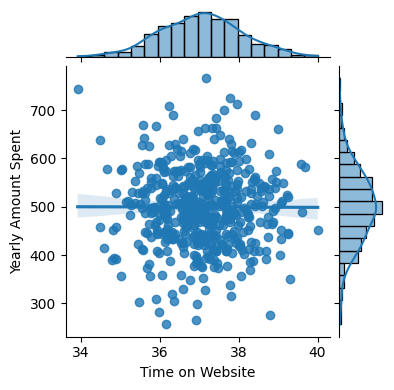

In [20]:
sns.jointplot(data=df,x="Time on Website",y="Yearly Amount Spent",kind= "reg",height=4)
plt.show()

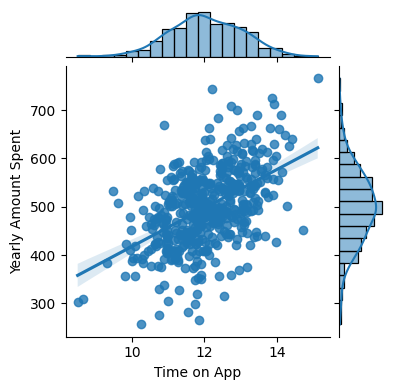

In [19]:
# plt.figure(figsize=(2,2))
sns.jointplot(x=df["Time on App"],y=df['Yearly Amount Spent'],kind="reg",height=4)
plt.show()

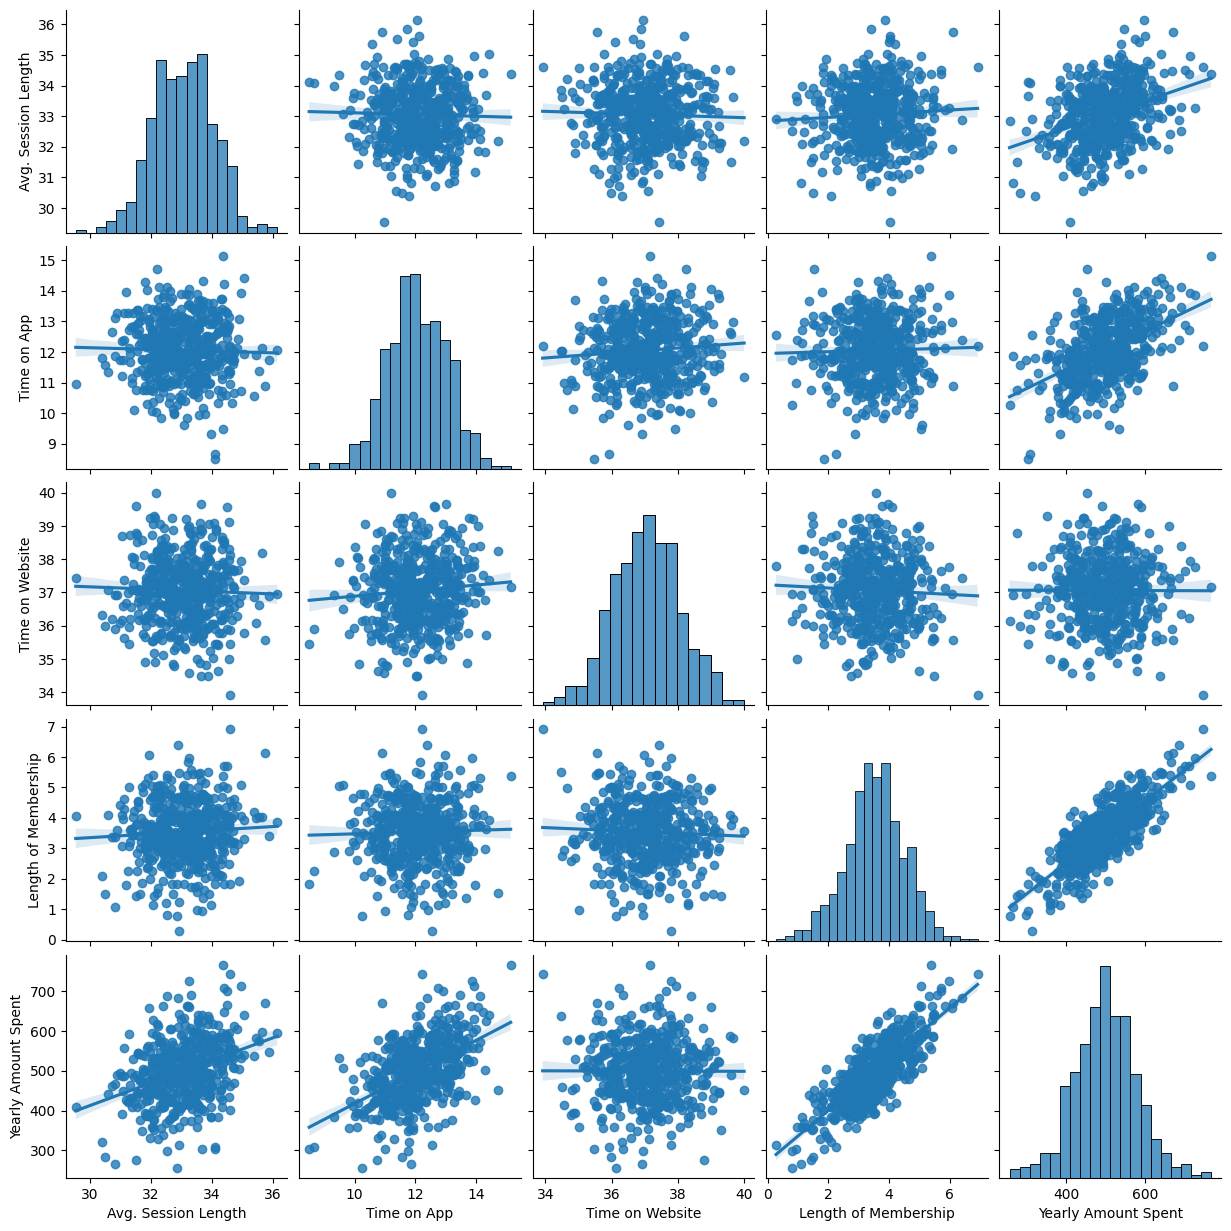

In [25]:
sns.pairplot(df,kind="reg")

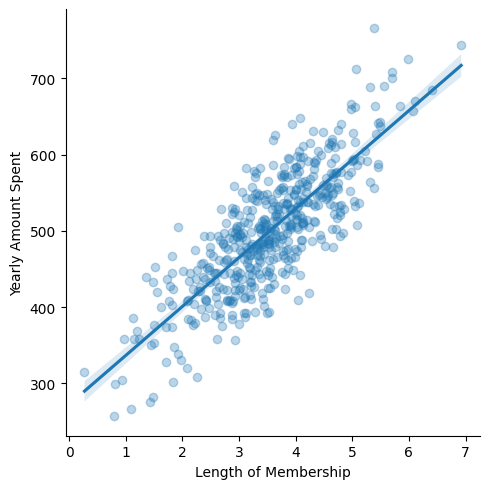

<Figure size 200x200 with 0 Axes>

In [31]:
sns.lmplot(df,x="Length of Membership",y="Yearly Amount Spent",scatter_kws={"alpha":0.3})
plt.figure(figsize=(2,2))
plt.show()

In [32]:
# model_distribution -- 

In [40]:
x = df.drop((["Yearly Amount Spent","Email","Address","Avatar"]),axis=1)
y = df["Yearly Amount Spent"]

In [41]:
x_train , x_test , y_train , y_test = train_test_split(
    x,
    y,
    random_state=42,
    test_size=0.2
)

In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   400 non-null    float64
 1   Time on App           400 non-null    float64
 2   Time on Website       400 non-null    float64
 3   Length of Membership  400 non-null    float64
dtypes: float64(4)
memory usage: 15.6 KB


In [47]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 100 entries, 361 to 15
Series name: Yearly Amount Spent
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [48]:
# train model -- 

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# coffeicient --
model.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [53]:
cdf = pd.DataFrame(model.coef_, x.columns,columns=["coeffiecient"])
cdf
# higer the value of coff --- more important the feature/variable

,coeffiecient
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


In [54]:
# predictions   -- 

In [58]:
y_pred = model.predict(x_test) 
y_pred

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

In [59]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

<Axes: xlabel='Yearly Amount Spent'>

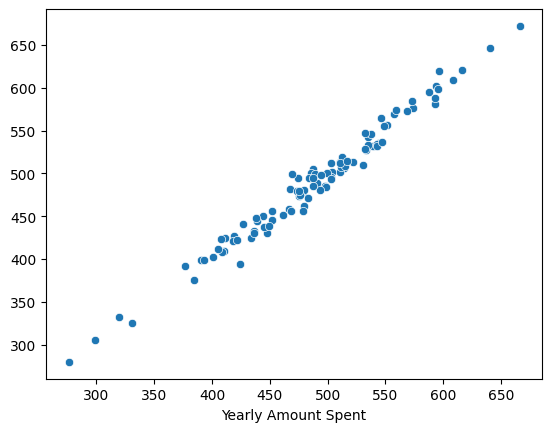

In [65]:
# prediction graph   

sns.scatterplot(x =y_test,y=y_pred)

In [60]:
# r2_scrore -- 

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9778130629184126